In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv('../data/clean/data_clean.csv')

In [18]:
dataset['Total_Vendas'] = dataset['Quantidade'] * dataset['Preço']
sales_by_product = dataset.groupby('Produto')['Total_Vendas'].sum().reset_index()

best_seller = sales_by_product.loc[sales_by_product['Total_Vendas'].idxmax()]
best_seller

Produto            Calça
Total_Vendas    86265.16
Name: 0, dtype: object

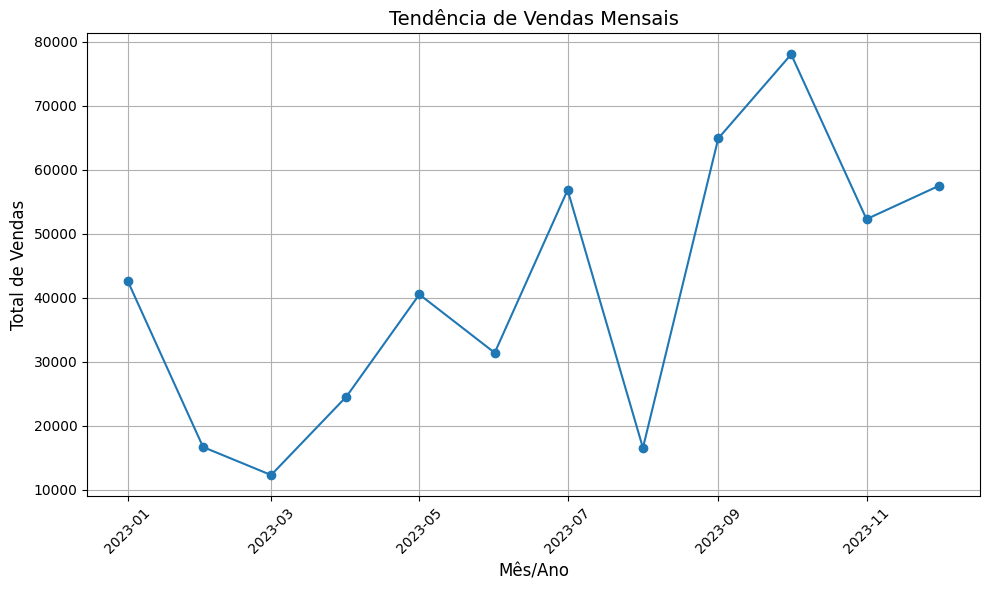

In [19]:
dataset['Data'] = pd.to_datetime(dataset['Data'], errors='coerce')
dataset['Mes_Ano'] = dataset['Data'].dt.to_period('M')
monthly_sale = dataset.groupby('Mes_Ano')['Total_Vendas'].sum().reset_index()
monthly_sale['Mes_Ano'] = monthly_sale['Mes_Ano'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sale['Mes_Ano'], monthly_sale['Total_Vendas'], marker='o', linestyle='-')
plt.title('Tendência de Vendas Mensais', fontsize=14)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights dos dados

1. As vendas apresentam uma variação significativa entre os meses, indicando possíveis sazonalidades;

2. O maior volume de vendas ocorreu no mês 10 do ano de 2023, último trimestre, sugerindo campanhas ou promoções específicas que podem ter impulsionado os resultados do final do ano.